# Item Recommender

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Shopping.csv')
df.head()

,Unnamed: 0,CustomerID,Genre,Age,Spending Score (1-100),Annual Income (k$),Items Bought
0,0,1,Male,19,39,15,"item8,item13,item15,item8,item2,"
1,1,2,Male,21,81,15,"item12,item1,item4,item14,item7,item15,item19,"
2,2,3,Female,20,6,16,"item19,item1,item16,item16,item14,item10,"
3,3,4,Female,23,77,16,"item8,item5,item15,item3,"
4,4,5,Female,31,40,17,"item4,item19,item2,item19,item5,item3,item12,"


In [3]:
#input to cluster
x = df.iloc[:,[3,4]].values

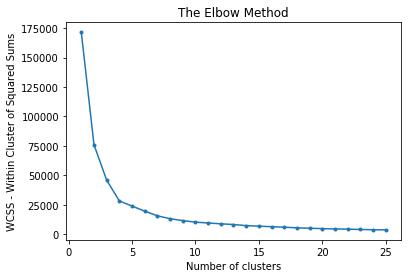

In [4]:
from sklearn.cluster import KMeans
#forming the elbow
#to find the optimum number of clusters
#not necessary in here
abc = []
for i in range (1,26):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    abc.append(kmeans.inertia_)
plt.plot(range(1,26),abc, marker = '.')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS - Within Cluster of Squared Sums")
plt.show()

In [5]:
#clustering
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(x)
y_means = kmeans.fit_predict(x)
y_means

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

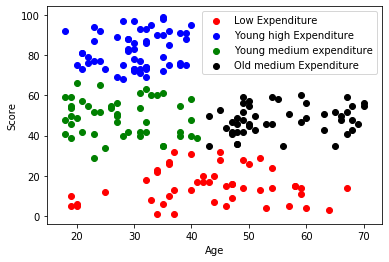

In [6]:
#Cluster plot
plt.scatter(x[y_means == 0,0],x[y_means == 0,1], c = 'r', label = 'Low Expenditure') 
plt.scatter(x[y_means == 1,0],x[y_means == 1,1], c = 'b', label = 'Young high Expenditure')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1], c = 'g', label = 'Young medium expenditure')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1], c = 'k', label = 'Old medium Expenditure')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1], s = 100, c = 'C4', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend()
plt.show()

In [7]:
#adding the cluster class to the dataframe
ykmeans1 = y_means
ykmeans1 = y_means+1
cluster = pd.DataFrame(ykmeans1)
df['cluster'] = cluster
df.head()

,Unnamed: 0,CustomerID,Genre,Age,Spending Score (1-100),Annual Income (k$),Items Bought,cluster
0,0,1,Male,19,39,15,"item8,item13,item15,item8,item2,",3
1,1,2,Male,21,81,15,"item12,item1,item4,item14,item7,item15,item19,",2
2,2,3,Female,20,6,16,"item19,item1,item16,item16,item14,item10,",1
3,3,4,Female,23,77,16,"item8,item5,item15,item3,",2
4,4,5,Female,31,40,17,"item4,item19,item2,item19,item5,item3,item12,",3


In [8]:
#KNN classifier
X = df.iloc[:, [3,4]]
Y = df.iloc[:, 7]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors = 3)
classifier_2.fit(X_train,Y_train)
y_pred = classifier_2.predict(X_test)
classifier_2.score(X_test,Y_test)*100

98.33333333333333

In [9]:
#Array of array of items bought by the customers in the cluster
items_1, items_2, items_3, items_4 = [], [], [], []
for i in range(len(y_means)):
    if  y_means[i] == 0:
        items_1.append(df.iloc[i,6])
        
    elif y_means[i] == 1:
        items_2.append(df.iloc[i,6])
        
    elif y_means[i] == 2:
        items_3.append(df.iloc[i,6])
        
    elif y_means[i] == 3:
        items_4.append(df.iloc[i,6])

In [10]:
#Item list for each cluster
l1,l2,l3,l4 = [],[],[],[]
for i in range(len(items_1)):
    l1.extend(items_1[i].split(',')[:-1])
    
for i in range(len(items_2)):
    l2.extend(items_2[i].split(',')[:-1])
    
for i in range(len(items_3)):
    l3.extend(items_3[i].split(',')[:-1])
    
for i in range(len(items_4)):
    l4.extend(items_4[i].split(',')[:-1])

In [11]:
#finding frequencies to find popular product
freq1 = {}
for item in l1:
    if item in freq1:
        freq1[item] += 1
    else:
        freq1[item] = 1
        
freq2 = {}
for item in l2:
    if item in freq2:
        freq2[item] += 1
    else:
        freq2[item] = 1

freq3 = {}
for item in l3:
    if item in freq3:
        freq3[item] += 1
    else:
        freq3[item] = 1
        
freq4 = {}
for item in l4:
    if item in freq4:
        freq4[item] += 1
    else:
        freq4[item] = 1

In [12]:
#sort the frequencies to recommend for each cluster
recommendations1 = sorted(freq1, key = freq1.get, reverse = True)
recommendations2 = sorted(freq2, key = freq2.get, reverse = True)
recommendations3 = sorted(freq3, key = freq3.get, reverse = True)
recommendations4 = sorted(freq4, key = freq4.get, reverse = True)

recommendations = []
recommendations.append(recommendations1)
recommendations.append(recommendations2)
recommendations.append(recommendations3)
recommendations.append(recommendations4)

In [13]:
#New Customer
def new():
    import random
    age = int(input('Enter age '))
    score = int(input("Enter your spending score(1-100) "))
    #score = random.randint(30,80)
    ym = classifier_2.predict([[age,score]])
    #print("Belongs to cluster ", ym[0])
    print("Recommendations")
    if ym[0] == 1:
        print(recommendations[0][:5])
    if ym[0] == 2:
        print(recommendations[1][:5])
    if ym[0] == 3:
        print(recommendations[2][:5])
    if ym[0] == 4:
        print(recommendations[3][:5])


#Existing Customer
def existing():
    uid = int(input("Enter your customer ID "))
    item_bought = df['Items Bought'][uid-1]
    a = item_bought.split(',')[:-1]
    ag = df.iloc[uid-1,3]
    sc = df.iloc[uid-1,4]
    ym1 = classifier_2.predict([[ag,sc]])
    cl = ym1[0]
    b = recommendations[cl]
    print('Recommendations')
    for i in range(len(a)):
        if a[i] in b:
            b.remove(a[i])
    
    print(b[:5])

In [14]:
#User
inp = input("Are you an existing user?(y/n)")
if inp.lower() == 'y':
    existing()
else:
    new()

Are you an existing user?(y/n)y
Enter your customer ID 5
Recommendations
['item9', 'item20', 'item16', 'item11', 'item18']
